In [1]:
import pandas as pd
from math import comb
from ax.service.ax_client import AxClient
import time
import sys
import numpy as np

sys.path.append('../')
import sdlnano as sdl
import calculation as calc

In [2]:
trials_per_iteration = 1

In [3]:
optimizer_init_file_name = "optimizer/optimizer_0_init.json"

ax_client_init = sdl.initialize_ax(SOBOL_trials=trials_per_iteration)
ax_client_init.save_to_json_file(optimizer_init_file_name)

[INFO 07-24 12:19:29] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 07-24 12:19:29] ax.service.utils.instantiation: Due to non-specification, we will use the heuristic for selecting objective thresholds.
[INFO 07-24 12:19:29] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='Drug_MW', parameter_type=FLOAT, range=[0.0, 1.0]), RangeParameter(name='Drug_LogP', parameter_type=FLOAT, range=[0.0, 1.0]), RangeParameter(name='Drug_TPSA', parameter_type=FLOAT, range=[0.0, 1.0]), RangeParameter(name='Drug', parameter_type=FLOAT, range=[0.0, 1.0]), RangeParameter(name='SL_1', parameter_type=FLOAT, range=[0.0, 1.0]), RangeParameter(name='SL_2', parameter_type=FLOAT, range=[0.0, 1.0]), RangeParameter(name='SL_3', parameter_type=FLOAT, range=[0.0, 1.0]), RangeParameter(name='LL_1', parameter_t

In [4]:
def run_virtual_test(n):

    iteration = 0
    # file path
    # ax_client_design_path = "optimizer/optimizer_design_" + str(iteration) + ".json"
    # unlabeled_trial_path = "data/unlabeled_" + str(iteration) + ".xlsx"
    # unlabeled_trial_processed_path = "data/unlabeled_processed_" + str(iteration) + ".xlsx"
    # transfer_path = 'data/transfer_' + str(iteration) + '.xlsx'
    # labeled_data_path = 'data/labeled_' + str(iteration) + '.xlsx'


    for i in range(n):

        print('*-' * 150)
        print('*-' * 150)
        print(f"Iteration {i} of {n-1}")

        if i == 0:
            unlabeled_trial, ax_client_design = sdl.generate_trials(ax_client=ax_client_init, num_of_trials = trials_per_iteration, drug = 'ACE', bopt=0)

        else:
            unlabeled_trial, ax_client_design = sdl.generate_trials(ax_client=ax_client_design, num_of_trials = trials_per_iteration, drug = 'ACE', bopt=1)

        labeled_norm_path = 'data/labeled_norm_' + str(iteration) + '.xlsx'
        loaded_optimizer_path = "optimizer/optimizer_load_" + str(iteration) + ".json"

        results = sdl.virtual_experiment(unlabeled_trial)
        results.to_excel(labeled_norm_path, index=False)

        # ax_client_design = AxClient.load_from_json_file(ax_client_design_path)
        loaded_ax_client = sdl.load_labeled_data(ax_client_design, labeled_norm_path)
        loaded_ax_client.save_to_json_file(loaded_optimizer_path)

        iteration = iteration + 1
        
        print('*-' * 150)
        print('*-' * 150)
        print()

    return loaded_ax_client
        

In [5]:
ax_client = run_virtual_test(20)



/Users/zeqing/opt/anaconda3/envs/sdlnano/lib/python3.10/site-packages/ax/modelbridge/cross_validation.py:463: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))
[INFO 07-24 12:19:29] ax.service.ax_client: Generated new trial 0 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.475107, 'SL_1': 0.592524, 'SL_2': 0.494479, 'SL_3': 0.313852, 'LL_1': 0.956092, 'LL_2': 0.083302, 'LL_3': 0.098763, 'P_1': 0.347466, 'P_2': 0.846915, 'P_3': 0.761508, 'S_1': 0.882807, 'S_2': 0.880169, 'S_3': 0.802465, 'Water': 0.851061} using model Sobol.
[INFO 07-24 12:19:29] ax.service.ax_client: Completed trial 0 with data: {'Solu': (0.325245, 0.0), 'Size': (0.646178, 0.0), 'PDI': (0.438731, 0.0), 'Complexity': (12.0, 0.0)}.
[INFO 07-24 12:19:29] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_0.

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Iteration 0 of 19
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

/Users/zeqing/opt/anaconda3/envs/sdlnano/lib/python3.10/site-packages/ax/modelbridge/cross_validation.py:463: UserWarning: Encountered exception in computing model fit quality: Outcome `Complexity` was not observed.
  warn("Encountered exception in computing model fit quality: " + str(e))
[INFO 07-24 12:19:30] ax.service.ax_client: Generated new trial 1 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 1.0, 'SL_1': 0.0, 'SL_2': 0.0, 'SL_3': 1.0, 'LL_1': 0.0, 'LL_2': 1.0, 'LL_3': 1.0, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:19:30] ax.service.ax_client: Completed trial 1 with data: {'Solu': (0.15, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.1, 0.0), 'Complexity': (4.0, 0.0)}.
[INFO 07-24 12:19:30] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_1.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:19:34] ax.service.ax_client: Generated new trial 2 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 1.0, 'SL_1': 0.0, 'SL_2': 0.766638, 'SL_3': 1.0, 'LL_1': 0.0, 'LL_2': 1.0, 'LL_3': 1.0, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:19:34] ax.service.ax_client: Completed trial 2 with data: {'Solu': (0.15, 0.0), 'Size': (0.153328, 0.0), 'PDI': (0.138332, 0.0), 'Complexity': (5.0, 0.0)}.
[INFO 07-24 12:19:34] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_2.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:19:38] ax.service.ax_client: Generated new trial 3 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.166384, 'SL_1': 0.0, 'SL_2': 0.0, 'SL_3': 1.0, 'LL_1': 0.0, 'LL_2': 1.0, 'LL_3': 1.0, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:19:38] ax.service.ax_client: Completed trial 3 with data: {'Solu': (0.15, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.1, 0.0), 'Complexity': (4.0, 0.0)}.
[INFO 07-24 12:19:38] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_3.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:19:44] ax.service.ax_client: Generated new trial 4 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.487039, 'SL_1': 0.0, 'SL_2': 0.0, 'SL_3': 1.0, 'LL_1': 0.764792, 'LL_2': 1.0, 'LL_3': 1.0, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:19:45] ax.service.ax_client: Completed trial 4 with data: {'Solu': (0.15, 0.0), 'Size': (0.229438, 0.0), 'PDI': (0.176479, 0.0), 'Complexity': (5.0, 0.0)}.
[INFO 07-24 12:19:45] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_4.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:19:49] ax.service.ax_client: Generated new trial 5 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.501927, 'SL_1': 0.121297, 'SL_2': 0.0, 'SL_3': 0.84501, 'LL_1': 0.0, 'LL_2': 0.702503, 'LL_3': 0.716679, 'P_1': 0.85811, 'P_2': 0.240709, 'P_3': 0.189463, 'S_1': 0.267819, 'S_2': 0.265654, 'S_3': 0.212075, 'Water': 0.24364} using model BoTorch.
[INFO 07-24 12:19:49] ax.service.ax_client: Completed trial 5 with data: {'Solu': (0.196233, 0.0), 'Size': (0.076161, 0.0), 'PDI': (0.151377, 0.0), 'Complexity': (10.0, 0.0)}.
[INFO 07-24 12:19:49] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_5.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:19:57] ax.service.ax_client: Generated new trial 6 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.673709, 'SL_1': 0.581486, 'SL_2': 0.0, 'SL_3': 0.655614, 'LL_1': 0.0, 'LL_2': 1.0, 'LL_3': 1.0, 'P_1': 0.589265, 'P_2': 0.070867, 'P_3': 0.213585, 'S_1': 0.0, 'S_2': 0.02076, 'S_3': 0.143781, 'Water': 0.064383} using model BoTorch.
[INFO 07-24 12:19:57] ax.service.ax_client: Completed trial 6 with data: {'Solu': (0.254724, 0.0), 'Size': (0.010802, 0.0), 'PDI': (0.181056, 0.0), 'Complexity': (9.0, 0.0)}.
[INFO 07-24 12:19:57] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_6.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:20:02] ax.service.ax_client: Generated new trial 7 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.595262, 'SL_1': 0.856245, 'SL_2': 0.0, 'SL_3': 0.98671, 'LL_1': 0.0, 'LL_2': 1.0, 'LL_3': 1.0, 'P_1': 0.935589, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:20:02] ax.service.ax_client: Completed trial 7 with data: {'Solu': (0.399103, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.142812, 0.0), 'Complexity': (5.0, 0.0)}.
[INFO 07-24 12:20:02] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_7.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:20:10] ax.service.ax_client: Generated new trial 8 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.585893, 'SL_1': 0.483897, 'SL_2': 0.0, 'SL_3': 1.0, 'LL_1': 0.0, 'LL_2': 1.0, 'LL_3': 1.0, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:20:10] ax.service.ax_client: Completed trial 8 with data: {'Solu': (0.295169, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.124195, 0.0), 'Complexity': (5.0, 0.0)}.
[INFO 07-24 12:20:10] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_8.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:20:15] ax.service.ax_client: Generated new trial 9 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.463443, 'SL_1': 0.677017, 'SL_2': 0.0, 'SL_3': 1.0, 'LL_1': 0.0, 'LL_2': 1.0, 'LL_3': 1.0, 'P_1': 0.480412, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.517274, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:20:15] ax.service.ax_client: Completed trial 9 with data: {'Solu': (0.301146, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.133851, 0.0), 'Complexity': (6.0, 0.0)}.
[INFO 07-24 12:20:15] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_9.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:20:21] ax.service.ax_client: Generated new trial 10 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.731556, 'SL_1': 0.0, 'SL_2': 0.0, 'SL_3': 1.0, 'LL_1': 0.0, 'LL_2': 1.0, 'LL_3': 1.0, 'P_1': 0.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.35866, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:20:21] ax.service.ax_client: Completed trial 10 with data: {'Solu': (0.05, 0.0), 'Size': (0.017933, 0.0), 'PDI': (0.135866, 0.0), 'Complexity': (4.0, 0.0)}.
[INFO 07-24 12:20:21] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_10.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:20:29] ax.service.ax_client: Generated new trial 11 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.562065, 'SL_1': 0.0, 'SL_2': 0.0, 'SL_3': 1.0, 'LL_1': 0.0, 'LL_2': 1.0, 'LL_3': 0.534266, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:20:29] ax.service.ax_client: Completed trial 11 with data: {'Solu': (0.15, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.1, 0.0), 'Complexity': (4.0, 0.0)}.
[INFO 07-24 12:20:29] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_11.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:20:40] ax.service.ax_client: Generated new trial 12 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.720808, 'SL_1': 0.0, 'SL_2': 0.0, 'SL_3': 1.0, 'LL_1': 0.0, 'LL_2': 0.227938, 'LL_3': 0.928702, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:20:40] ax.service.ax_client: Completed trial 12 with data: {'Solu': (0.188603, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.022794, 0.0), 'Complexity': (4.0, 0.0)}.
[INFO 07-24 12:20:40] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_12.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:20:52] ax.service.ax_client: Generated new trial 13 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.582338, 'SL_1': 1.0, 'SL_2': 0.0, 'SL_3': 0.492017, 'LL_1': 0.0, 'LL_2': 0.0, 'LL_3': 0.934173, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:20:52] ax.service.ax_client: Completed trial 13 with data: {'Solu': (0.449202, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.05, 0.0), 'Complexity': (4.0, 0.0)}.
[INFO 07-24 12:20:52] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_13.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:21:02] ax.service.ax_client: Generated new trial 14 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.617301, 'SL_1': 1.0, 'SL_2': 0.0, 'SL_3': 0.098751, 'LL_1': 0.0, 'LL_2': 0.0, 'LL_3': 1.0, 'P_1': 1.0, 'P_2': 0.307733, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:21:02] ax.service.ax_client: Completed trial 14 with data: {'Solu': (0.379102, 0.0), 'Size': (0.030773, 0.0), 'PDI': (0.05, 0.0), 'Complexity': (5.0, 0.0)}.
[INFO 07-24 12:21:02] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_14.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:21:16] ax.service.ax_client: Generated new trial 15 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.584264, 'SL_1': 1.0, 'SL_2': 0.0, 'SL_3': 0.466406, 'LL_1': 0.0, 'LL_2': 0.0, 'LL_3': 0.908045, 'P_1': 0.955476, 'P_2': 0.0, 'P_3': 0.167749, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:21:16] ax.service.ax_client: Completed trial 15 with data: {'Solu': (0.442188, 0.0), 'Size': (-0.016775, 0.0), 'PDI': (0.08355, 0.0), 'Complexity': (5.0, 0.0)}.
[INFO 07-24 12:21:16] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_15.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:21:27] ax.service.ax_client: Generated new trial 16 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.585812, 'SL_1': 1.0, 'SL_2': 0.0, 'SL_3': 0.50524, 'LL_1': 0.0, 'LL_2': 0.0, 'LL_3': 0.890039, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.076234, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:21:27] ax.service.ax_client: Completed trial 16 with data: {'Solu': (0.450524, 0.0), 'Size': (-0.007623, 0.0), 'PDI': (0.065247, 0.0), 'Complexity': (5.0, 0.0)}.
[INFO 07-24 12:21:27] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_16.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:21:47] ax.service.ax_client: Generated new trial 17 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.569152, 'SL_1': 0.326639, 'SL_2': 0.0, 'SL_3': 0.35903, 'LL_1': 0.0, 'LL_2': 0.0, 'LL_3': 1.0, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:21:47] ax.service.ax_client: Completed trial 17 with data: {'Solu': (0.233895, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.016332, 0.0), 'Complexity': (4.0, 0.0)}.
[INFO 07-24 12:21:47] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_17.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:22:00] ax.service.ax_client: Generated new trial 18 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.0, 'SL_1': 1.0, 'SL_2': 0.0, 'SL_3': 0.944727, 'LL_1': 0.0, 'LL_2': 0.0, 'LL_3': 1.0, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.0, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:22:00] ax.service.ax_client: Completed trial 18 with data: {'Solu': (0.494473, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.05, 0.0), 'Complexity': (4.0, 0.0)}.
[INFO 07-24 12:22:00] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_18.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-24 12:22:17] ax.service.ax_client: Generated new trial 19 with parameters {'Drug_MW': 0.354, 'Drug_LogP': 0.391, 'Drug_TPSA': 0.067, 'Drug': 0.0, 'SL_1': 0.508515, 'SL_2': 0.0, 'SL_3': 1.0, 'LL_1': 0.0, 'LL_2': 0.0, 'LL_3': 0.483167, 'P_1': 1.0, 'P_2': 0.0, 'P_3': 0.0, 'S_1': 0.116358, 'S_2': 0.0, 'S_3': 0.0, 'Water': 0.0} using model BoTorch.
[INFO 07-24 12:22:17] ax.service.ax_client: Completed trial 19 with data: {'Solu': (0.352554, 0.0), 'Size': (0.0, 0.0), 'PDI': (0.025426, 0.0), 'Complexity': (5.0, 0.0)}.
[INFO 07-24 12:22:17] ax.service.ax_client: Saved JSON-serialized state of optimization to `optimizer/optimizer_load_19.json`.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-



In [6]:
final_df = ax_client.get_trials_data_frame()

iteration_list = []

n = 1  
length = len(final_df)
number_list = [i // n for i in range(length)]

final_df['iteration'] = number_list
final_df

[WARNING 07-24 12:22:17] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


,trial_index,arm_name,trial_status,generation_method,Complexity,PDI,Size,Solu,Drug_MW,Drug_LogP,...,LL_2,LL_3,P_1,P_2,P_3,S_1,S_2,S_3,Water,iteration
0,0,0_0,COMPLETED,Sobol,12.0,0.438731,0.646178,0.325245,0.354,0.391,...,0.083302,0.098763,0.347466,0.846915,0.761508,0.882807,0.880169,0.802465,0.851061,0
1,1,1_0,COMPLETED,BoTorch,4.0,0.100000,0.000000,0.150000,0.354,0.391,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,2_0,COMPLETED,BoTorch,5.0,0.138332,0.153328,0.150000,0.354,0.391,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
3,3,3_0,COMPLETED,BoTorch,4.0,0.100000,0.000000,0.150000,0.354,0.391,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
4,4,4_0,COMPLETED,BoTorch,5.0,0.176479,0.229438,0.150000,0.354,0.391,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
5,5,5_0,COMPLETED,BoTorch,10.0,0.151377,0.076161,0.196233,0.354,0.391,...,0.702503,0.716679,0.858110,0.240709,0.189463,0.267819,0.265654,0.212075,0.243640,5
6,6,6_0,COMPLETED,BoTorch,9.0,0.181056,0.010802,0.254724,0.354,0.391,...,1.000000,1.000000,0.589265,0.070867,0.213585,0.000000,0.020760,0.143781,0.064383,6
7,7,7_0,COMPLETED,BoTorch,5.0,0.142812,0.000000,0.399103,0.354,0.391,...,1.000000,1.000000,0.935589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7
8,8,8_0,COMPLETED,BoTorch,5.0,0.124195,0.000000,0.295169,0.354,0.391,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8
9,9,9_0,COMPLETED,BoTorch,6.0,0.133851,0.000000,0.301146,0.354,0.391,...,1.000000,1.000000,0.480412,0.000000,0.000000,0.517274,0.000000,0.000000,0.000000,9


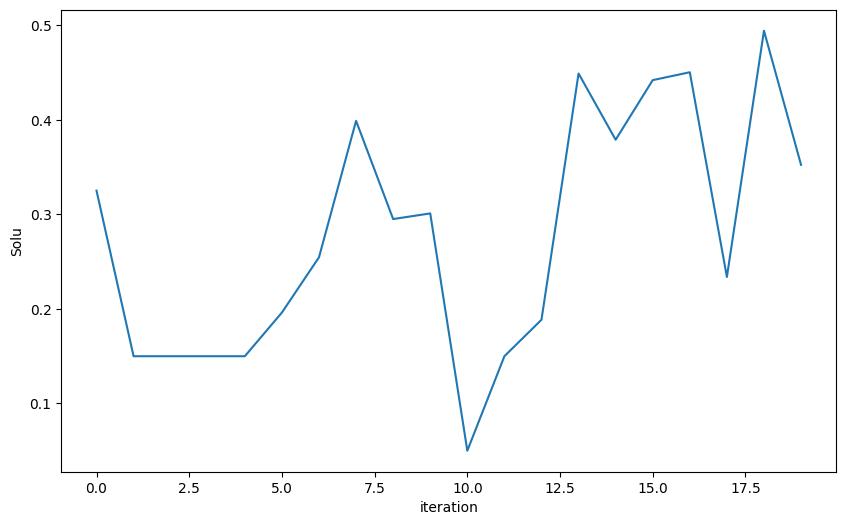

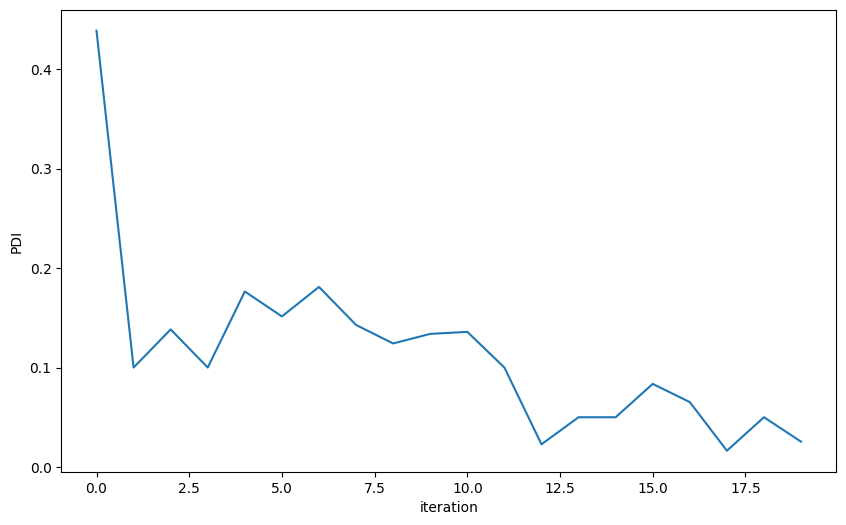

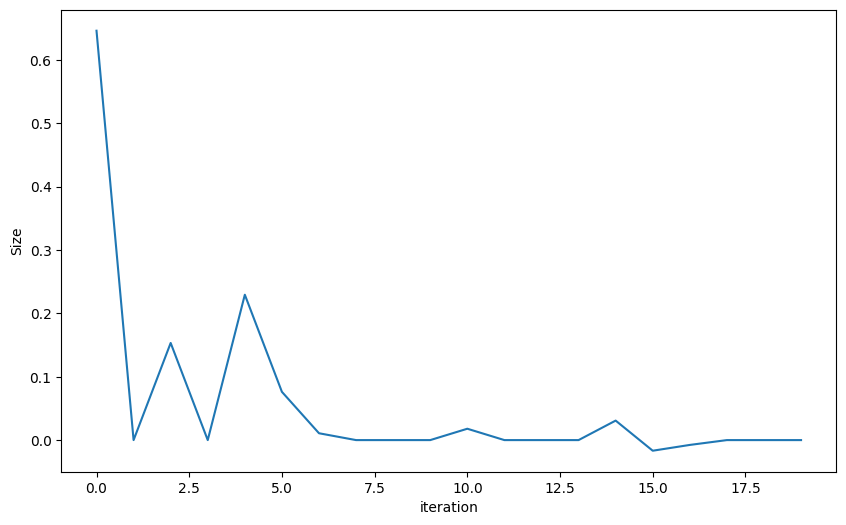

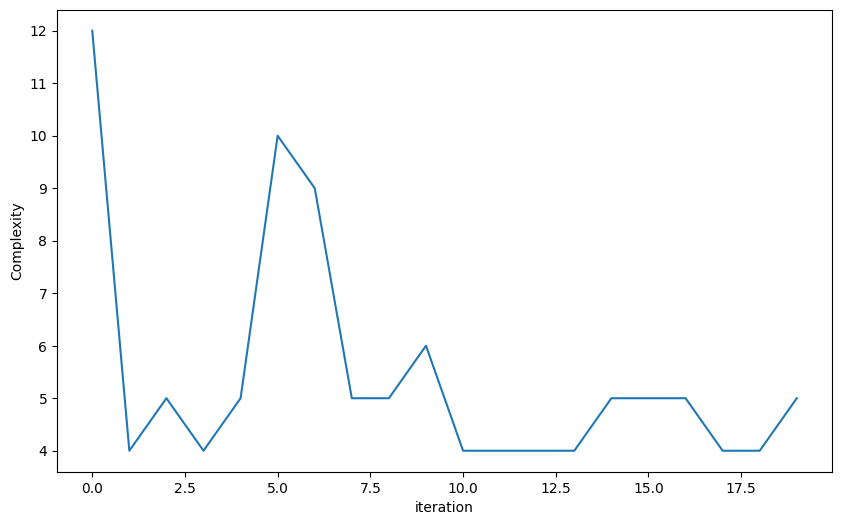

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for obj in ['Solu', 'PDI', 'Size', 'Complexity']:

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=final_df, x='iteration', y=obj)
